# Goal: to predict the sales price for each house. For each Id in the test set, predict the value of the SalePrice

# 1.1 import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

# ML models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# metrics to evaluate regression model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1.2 Load wrangled datasets

In [3]:
train_df=pd.read_csv('train.csv') # contains features and target variable (SalePrice)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
target=train_df[['Id','SalePrice']]
target.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [18]:
data_set=pd.read_csv('wrangled_train_test_data_set.csv')
data_set=data_set.iloc[:,1:]
data_set.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [15]:
train_data_set=pd.read_csv('wrangled_train_data_set.csv')
train_data_set=train_data_set.iloc[:,1:]
train_data_set.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# 3 EDA
## 3.1 Distribution of SalePrice (target var)

Skewness: 1.882876
Kurtosis: 6.536282


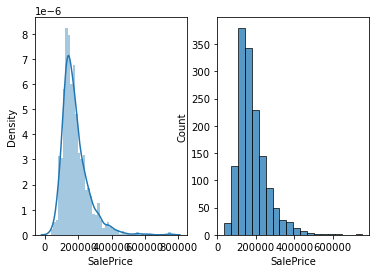

In [20]:
fig, ax =plt.subplots(1,2)
sns.distplot(target['SalePrice'], kde=True, ax=ax[0])
sns.histplot(target['SalePrice'], bins=20, ax=ax[1])

print('Skewness: %f' %target['SalePrice'].skew())
print('Kurtosis: %f' %target['SalePrice'].kurt())

In [21]:
high_price_houses=target.loc[target['SalePrice']>=500000]
medium_price_houses=target.loc[(target['SalePrice']>=100000)& (target['SalePrice']<=200000)]
low_price_houses=target.loc[target['SalePrice']<=100000]

print('Number of houses with >500k price:', high_price_houses.shape[0], 
      '\nNumber of houses with <=100k price:',low_price_houses.shape[0],
      '\nNumber of houses with 100-200k price:',medium_price_houses.shape[0])

Number of houses with >500k price: 9 
Number of houses with <=100k price: 123 
Number of houses with 100-200k price: 919


##### What features make >500k houses pricy?

# 3.2 Numeric Columns of combined df

In [22]:
num_cols=data_set.select_dtypes(exclude='object')
print(num_cols.columns)
print(num_cols.shape)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
(2906, 34)


In [23]:
num_cols.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [24]:
# are any missing values in numeric columns?
num_cols.isnull().sum().sort_values(ascending=False).head(15)

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

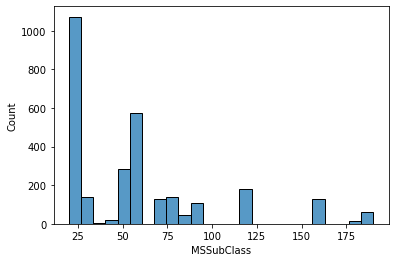

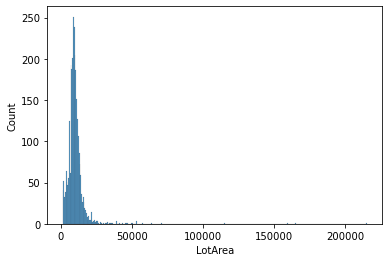

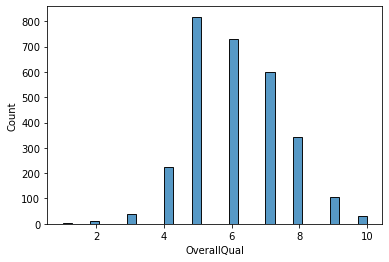

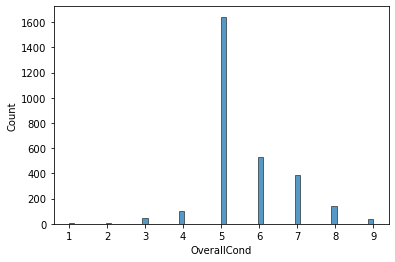

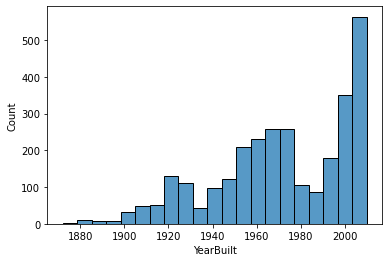

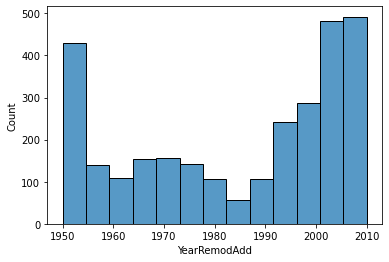

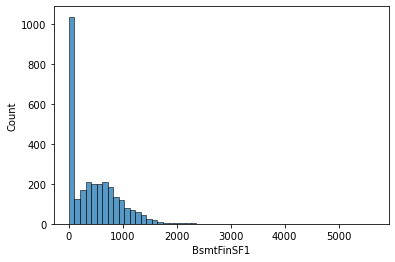

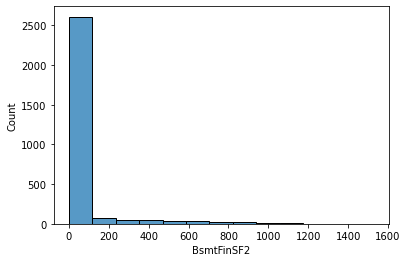

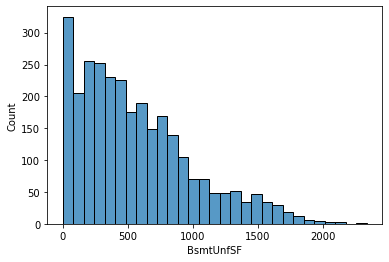

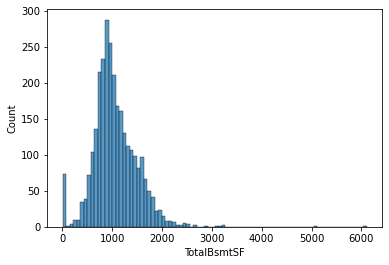

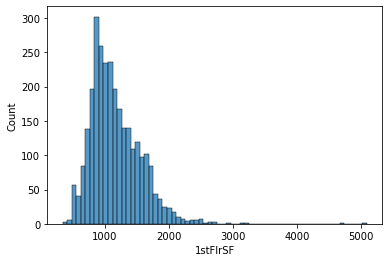

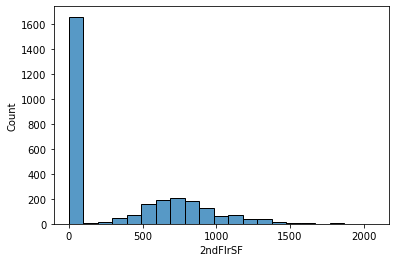

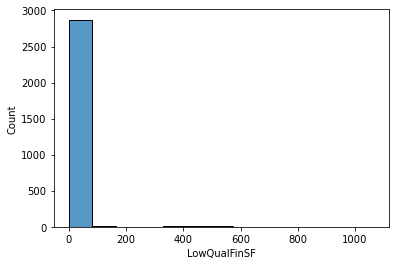

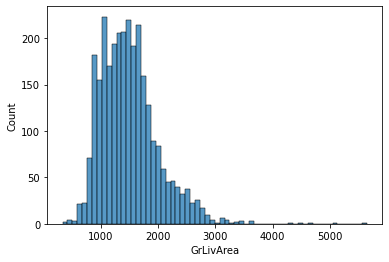

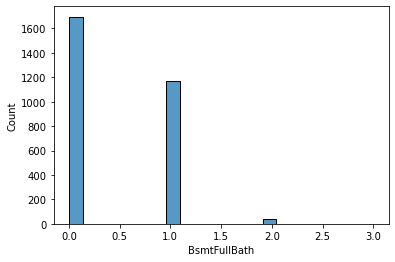

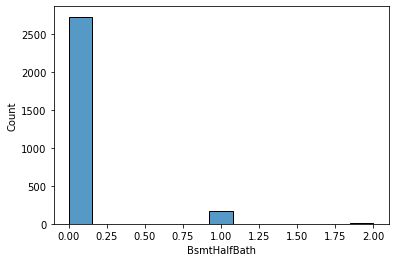

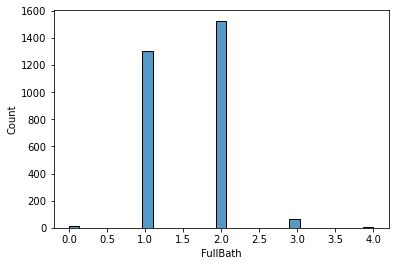

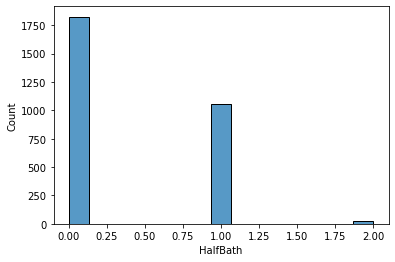

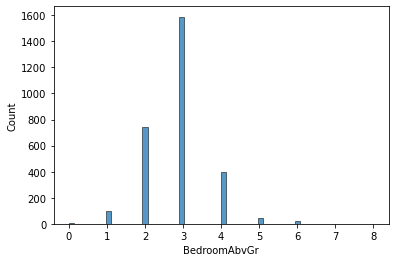

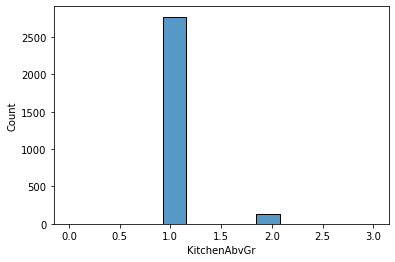

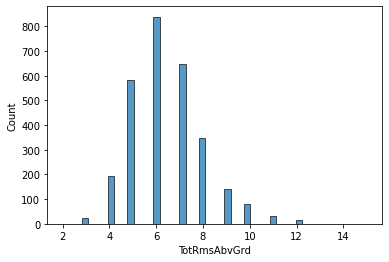

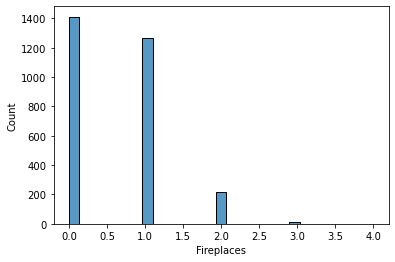

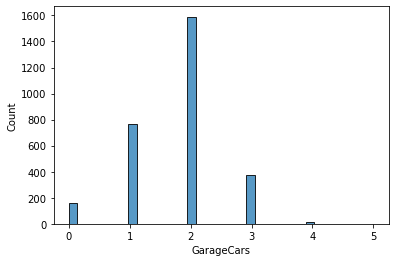

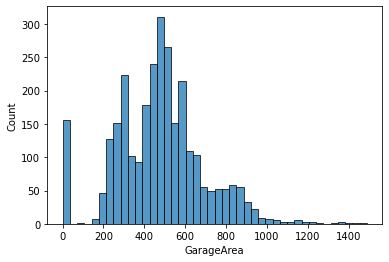

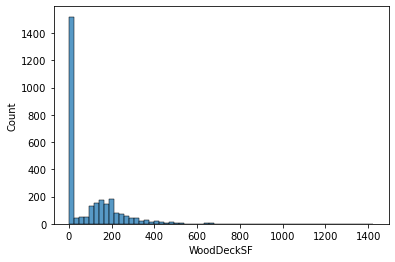

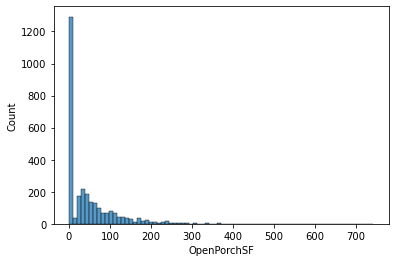

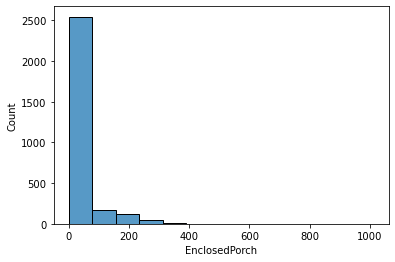

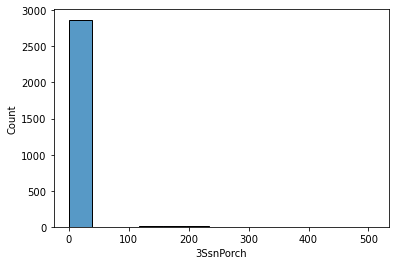

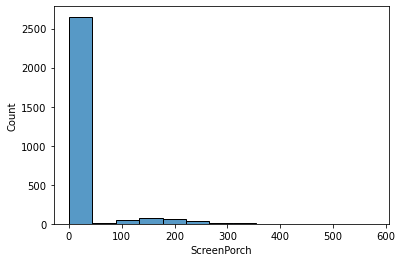

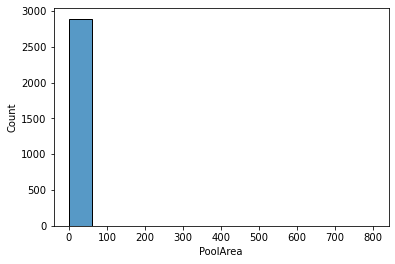

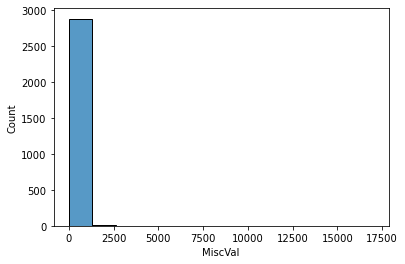

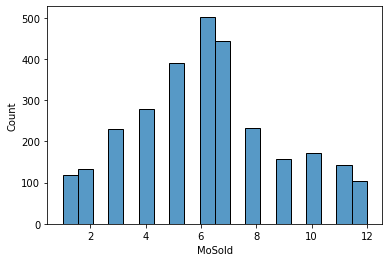

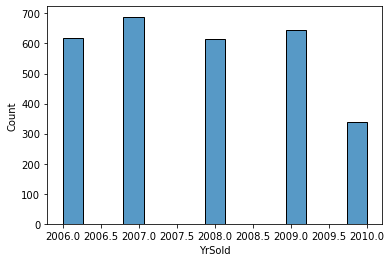

In [25]:
# plotting distribution of numeric columns
for i in num_cols.columns[1:]: # plots all columns except Id
    #sns.distplot(num_cols[i], kde=True) # distribution plots view
    sns.histplot(num_cols[i]) # histogram view
    plt.show()

##### LotArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea columns had skewed distribution; may require log transformation

# 3.2.1 Bi-variate plots 

checking distribution of numberic cols vs SalePrice from only train_data_set because test_df doesn't have SalePrice column; this shows what features are linearly related with target feature (SalePrice).

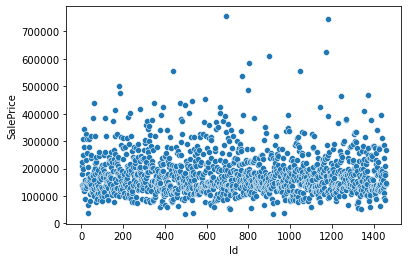

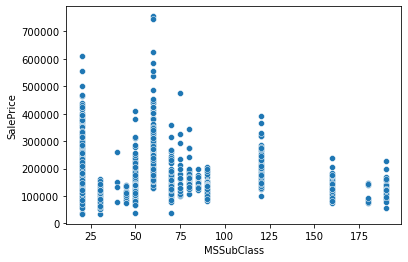

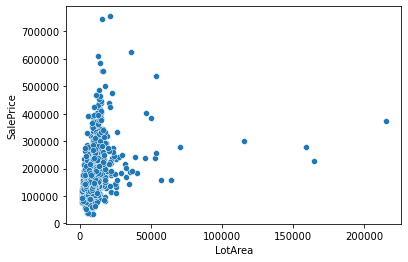

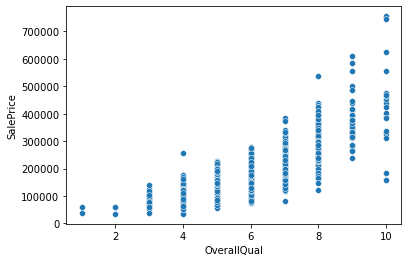

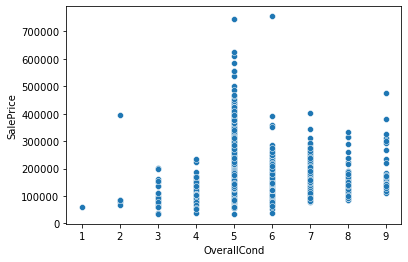

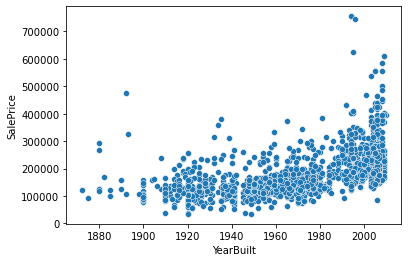

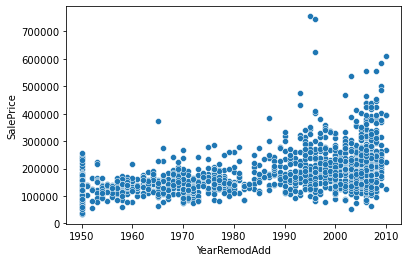

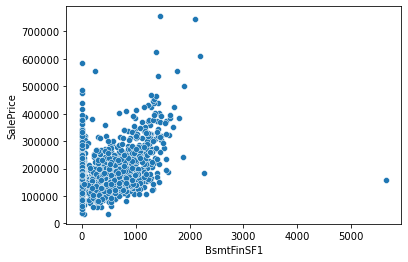

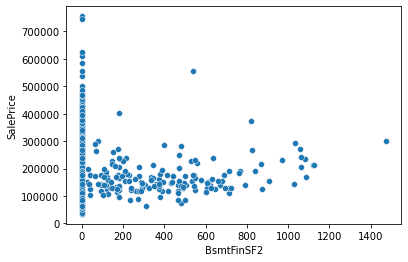

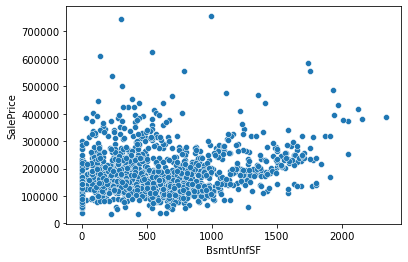

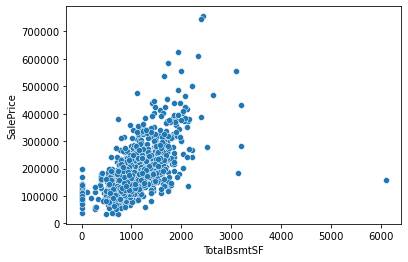

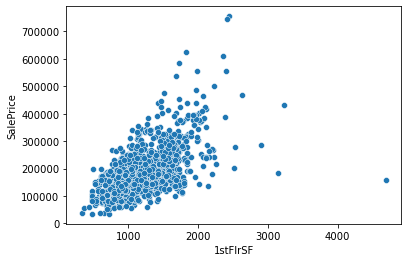

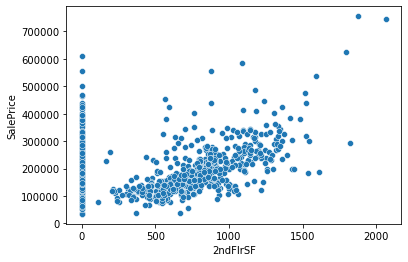

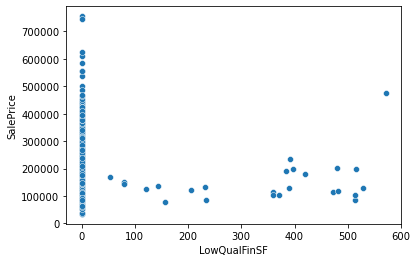

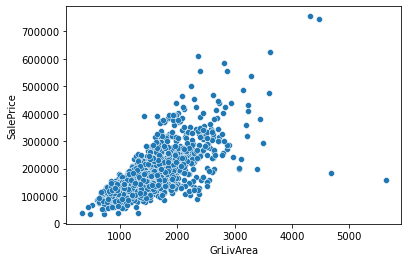

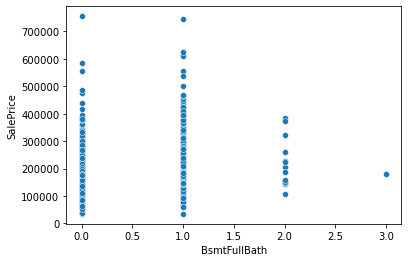

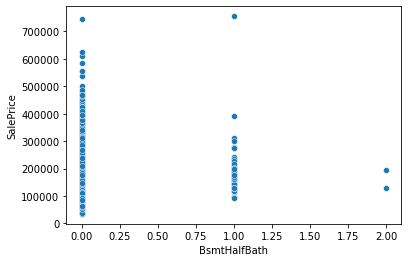

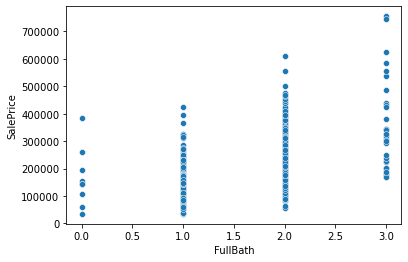

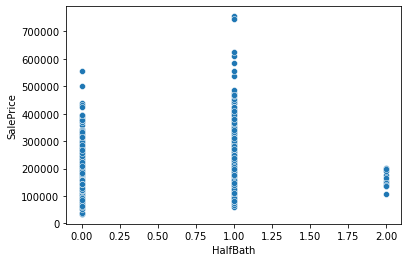

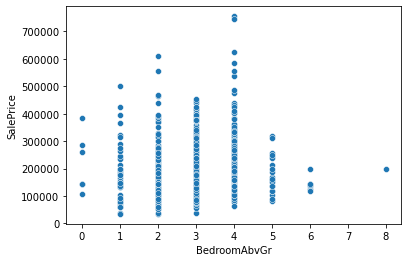

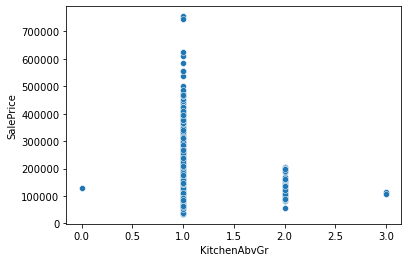

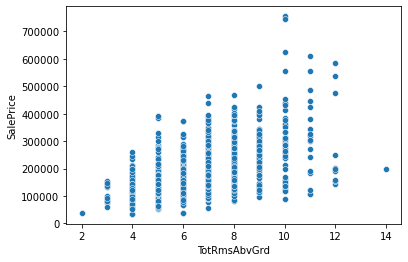

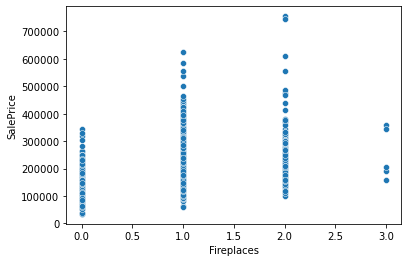

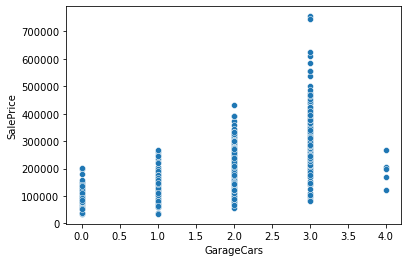

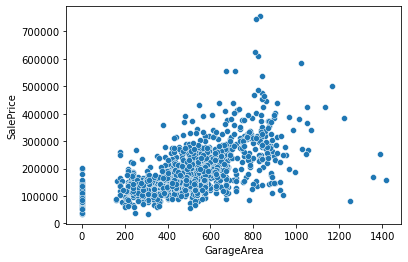

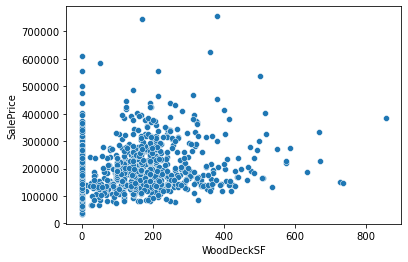

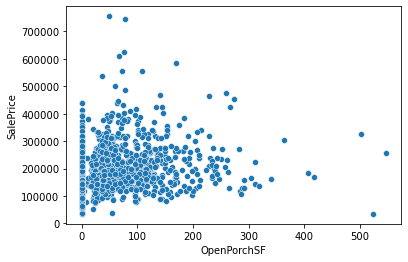

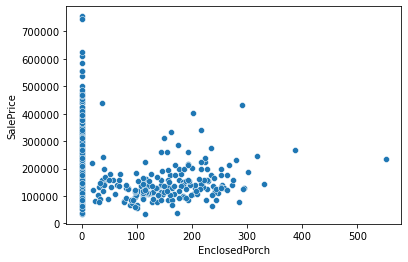

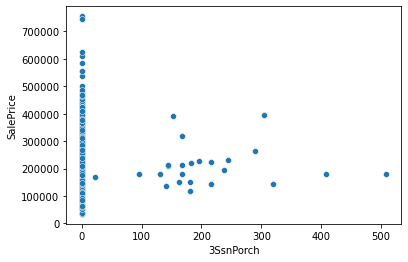

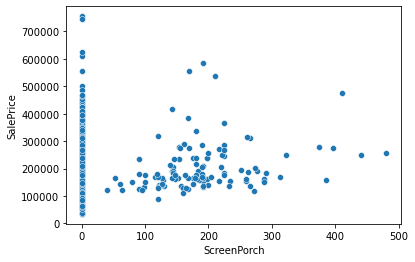

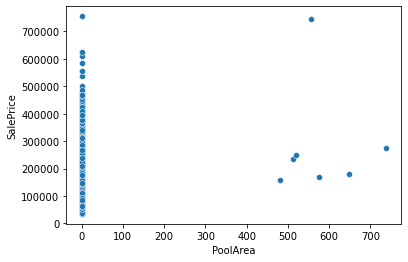

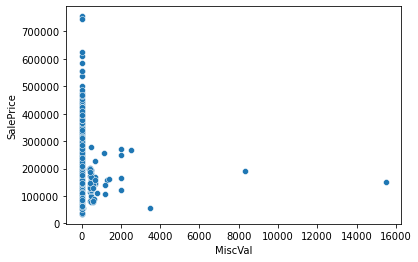

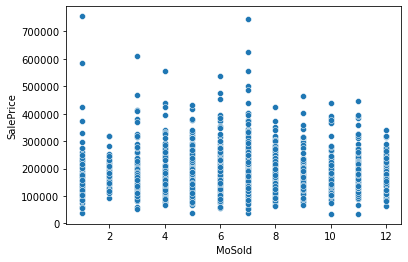

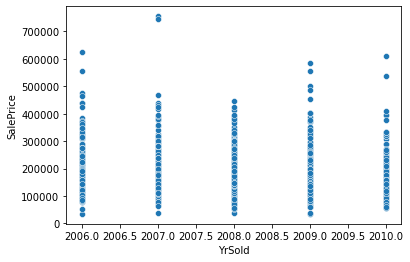

In [26]:
# Scatter plots used for Bi-variate analysis; is recommended
for i in num_cols[1:]:
    #print(num_cols[i])
    sns.scatterplot(x=train_data_set[i], y=train_data_set['SalePrice'])
    plt.show()

18


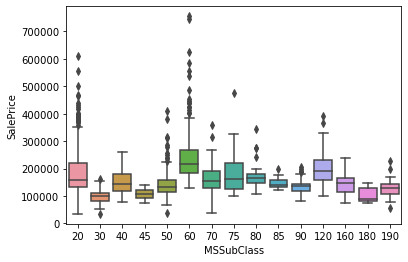

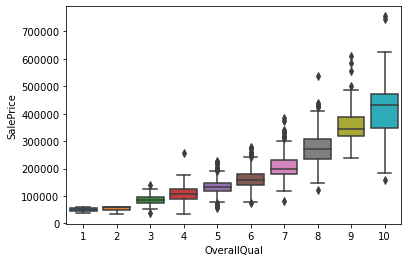

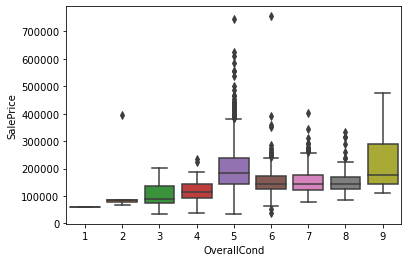

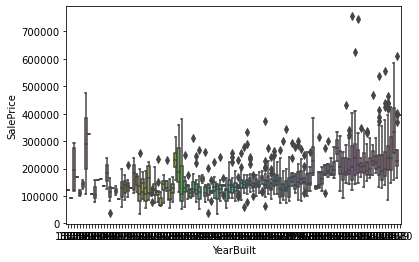

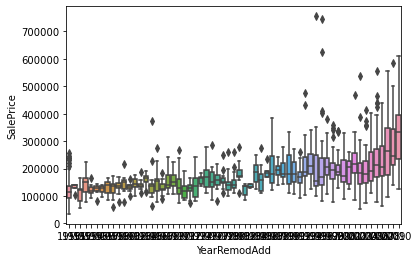

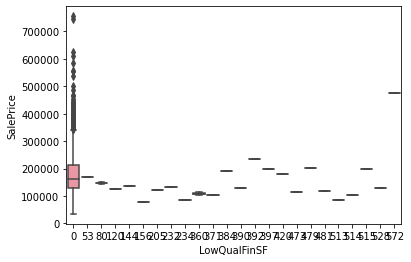

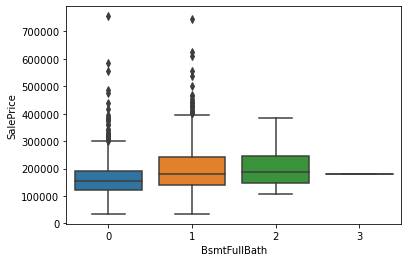

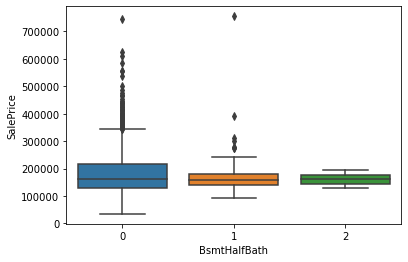

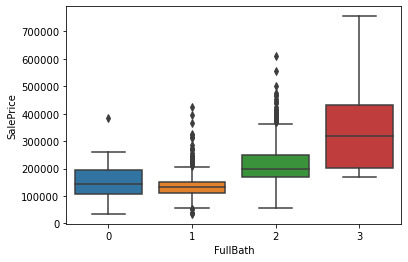

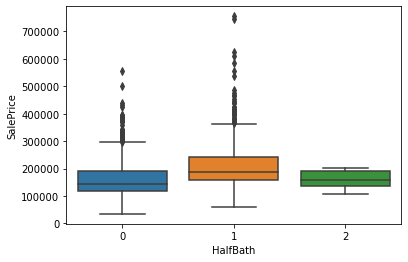

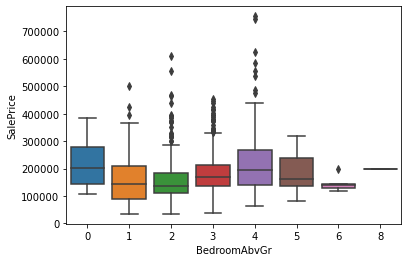

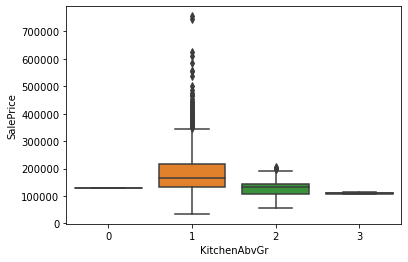

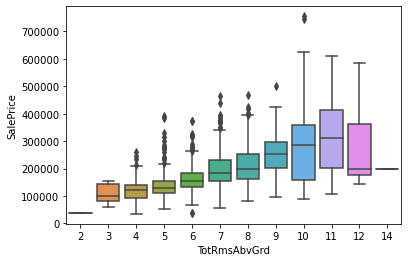

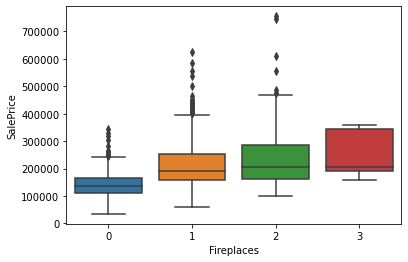

KeyError: 'GarageYrBlt'

In [27]:
cols=['MSSubClass', 'OverallQual','OverallCond','YearBuilt','YearRemodAdd','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']
print(len(cols))
for i in cols:
    sns.boxplot(x=train_data_set[i], y=train_data_set['SalePrice'])
    plt.show()

### 3.2.2 MSSubClass had several discreate values; so creating a new feature by grouping the values

In [ ]:
train_data_set = train_data_set.replace({"MSSubClass": {60: 'high', 120: 'high', 30: 'low', 45:'low', 20:'med', 40:'med',50:'med',70:'med',75: 'med',80:'med',85:'med',90: 'med',160: 'med',180:'med',190:'med'}}) 
train_data_set.head()  
sns.boxplot(x=train_data_set["MSSubClass"], y=train_data_set['SalePrice'])


In [ ]:
data_set = data_set.replace({"MSSubClass": {60: 'high', 120: 'high', 30: 'low', 45:'low', 20:'med', 40:'med',50:'med',70:'med',75: 'med',80:'med',85:'med',90: 'med',160: 'med',180:'med',190:'med'}}) 
data_set.head()                                           

In [28]:
data_set['MSSubClass'].value_counts()

20     1073
60      575
50      285
120     182
30      137
160     128
70      126
80      117
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

# 3.3 Categorical Variables

In [29]:
cat_fea=data_set.select_dtypes(include='object')
cat_fea.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


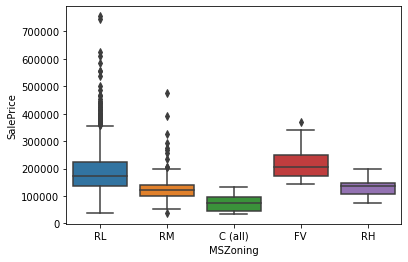

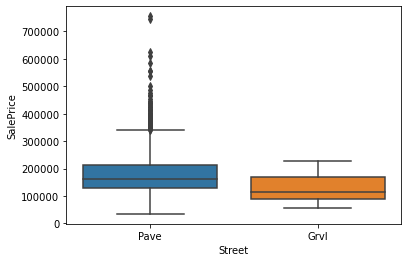

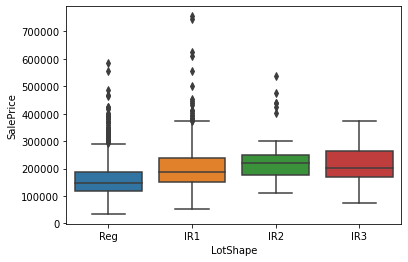

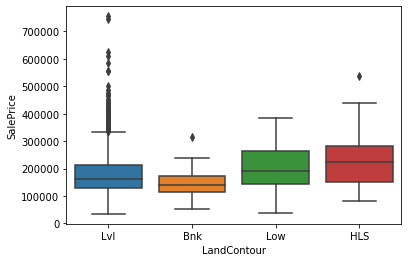

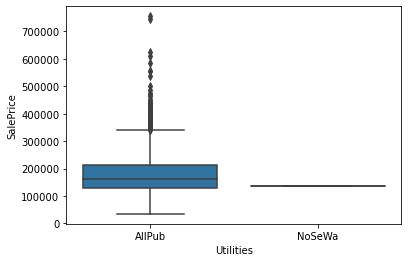

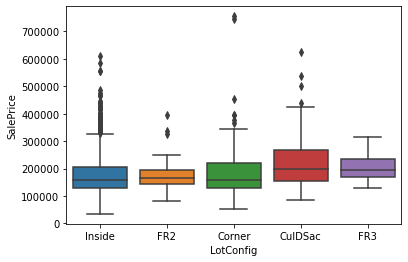

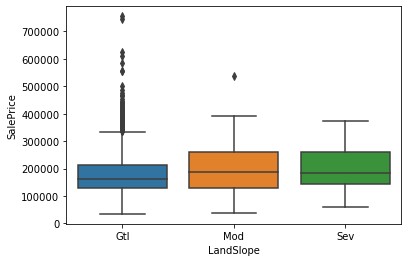

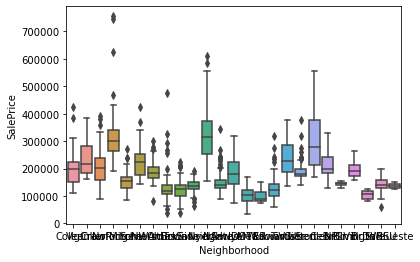

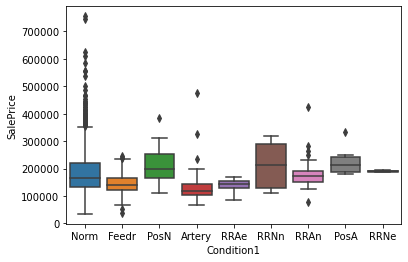

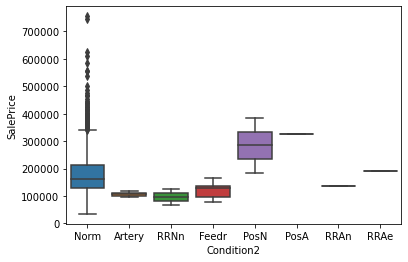

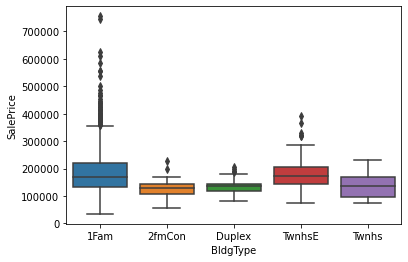

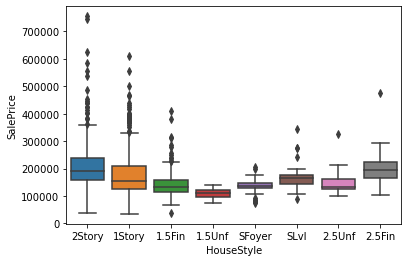

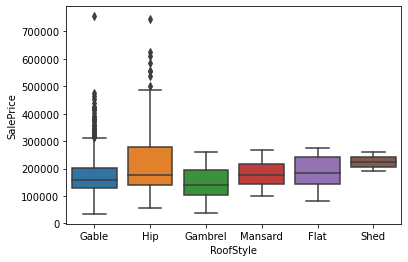

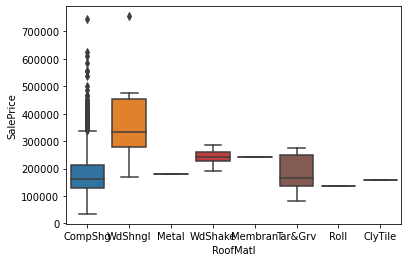

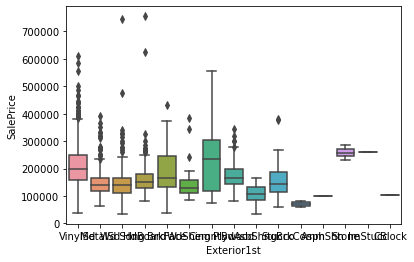

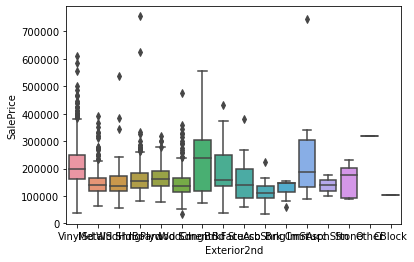

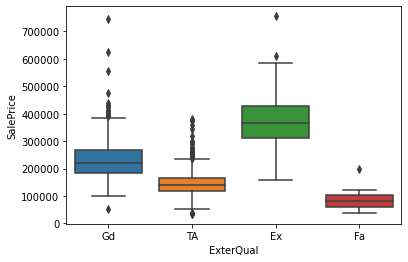

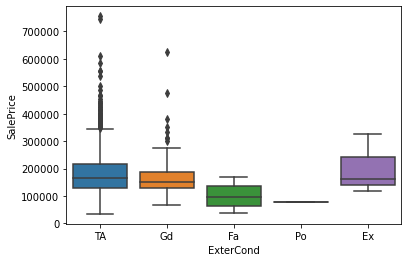

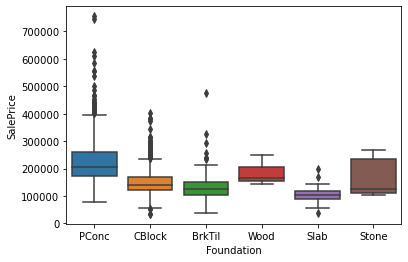

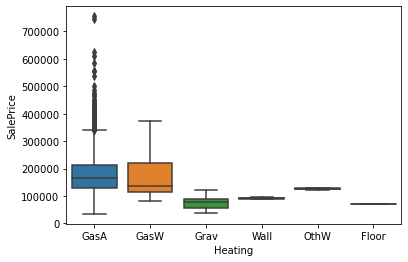

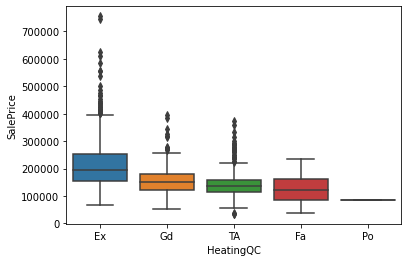

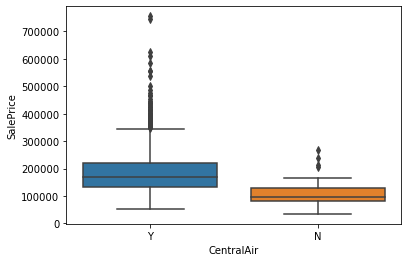

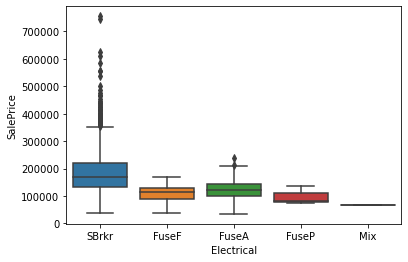

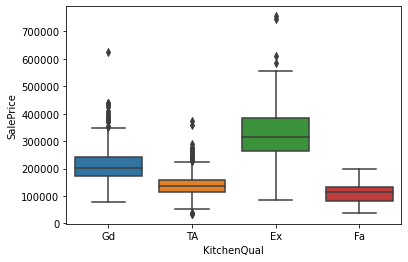

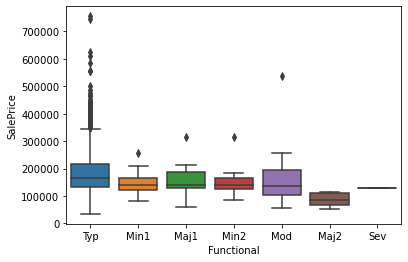

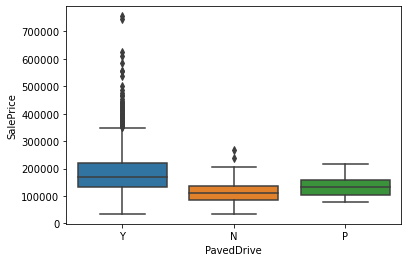

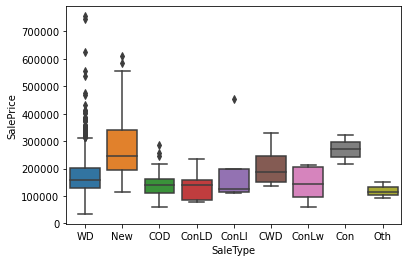

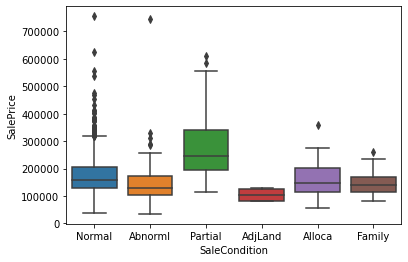

In [30]:
for j in cat_fea:
    sns.boxplot(x=train_data_set[j], y=train_data_set['SalePrice'])
    plt.show()

# 3.4 Correlation matrix with combined df (note SalePrice fea is not there)

<AxesSubplot:>

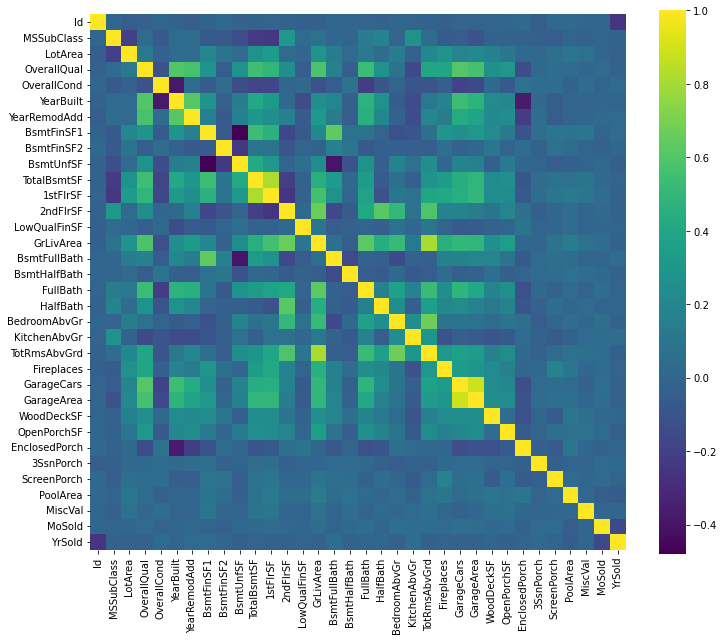

In [31]:
data_set_corr_mat=data_set.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(data_set_corr_mat, cmap='viridis', square=True)

# 3.4.1 Correlation matrix with train_data_set since we want to see correlation of features with SalePrice to determine predictive features

<AxesSubplot:>

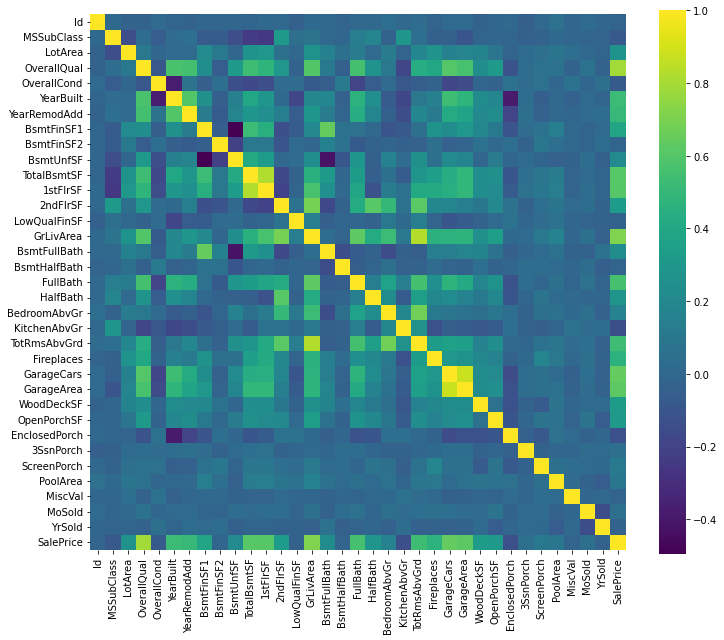

In [32]:
train_corr_mat=train_data_set.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(train_corr_mat, cmap='viridis', square=True)

# 3.4.2 Plot top 10 correlated features with values

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')


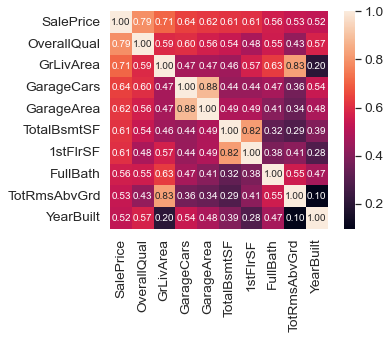

In [33]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train_corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train_data_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Summary: OverallQual, GrLivArea are more correlated with SalePrice. GarageCars and GarageArea seems to be colinear features, will have same info means # of cars fit in Garage depends on Garage Size. So, keep only GarageCars column. Similary, TotalBsmtSF and 1stFlrSF are coliniear, keep TotalBsmtSF column. FullBath, TotRmsAbvGrd, Year Built seem correlated with Sale price

## 3.5 Handling Outliers
### 3.5.1 Univariate plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

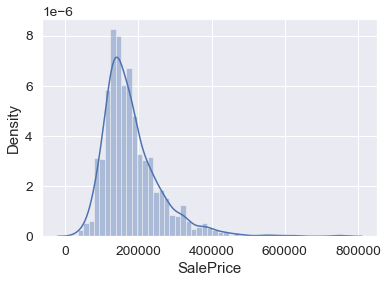

In [34]:
sns.distplot(train_data_set.SalePrice) ## since train_data_set contains SalePrice column

## 3.5.2 Bivariate plots with key features
### 3.5.2.1 Detect and drop Outliers from key features

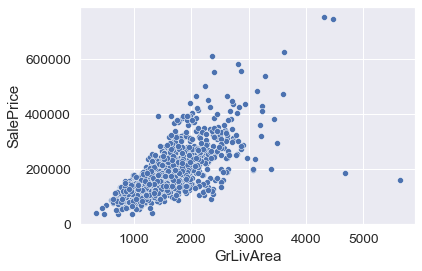

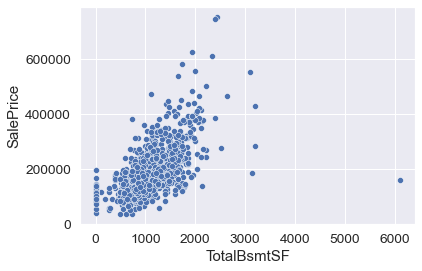

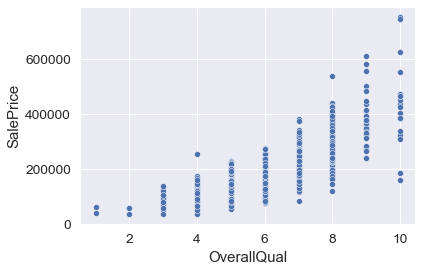

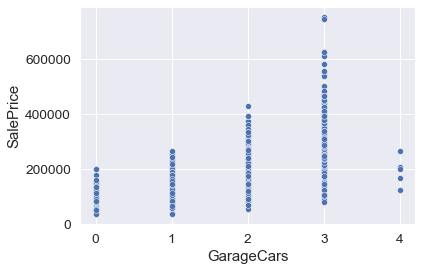

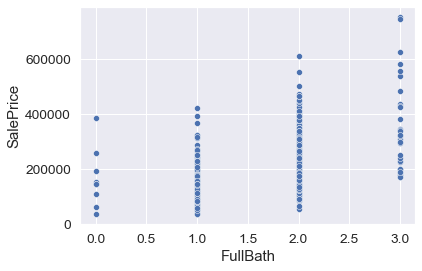

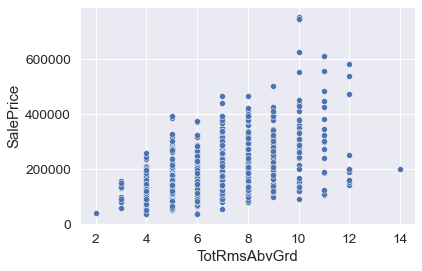

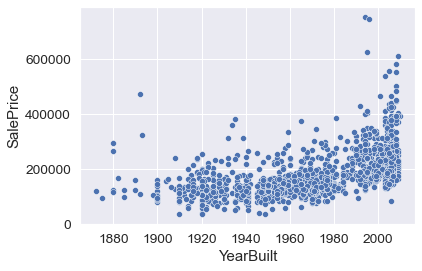

In [35]:
# top features from corr_matrix
key_features=['GrLivArea','TotalBsmtSF','OverallQual','GarageCars','FullBath', 'TotRmsAbvGrd', 'YearBuilt']
for i in key_features:
    sns.scatterplot(x=train_data_set[i], y=train_data_set['SalePrice'])
    #sns.boxplot(x=train_data_set[i], y=train_data_set['SalePrice'])
    plt.show()  

# 3.5.2.2 Drop outliers from combined df, and train_data_set

In [36]:
# slice outlier values
train_data_set.loc[(train_data_set['GrLivArea']>4000) & (train_data_set['SalePrice']<185000)]['GrLivArea']

523     4676
1298    5642
Name: GrLivArea, dtype: int64

In [37]:
# drop rows with GrLivArea >4000 but SalePrice <185000 to keep top outliers
train_df1 = train_data_set.drop(train_data_set
                   [(train_data_set['GrLivArea']>4000) & (train_data_set['SalePrice']<185000)].index)

train_df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [38]:
print(train_data_set.shape)
print(train_df1.shape)

(1459, 63)
(1457, 63)


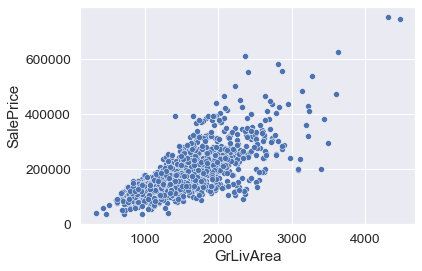

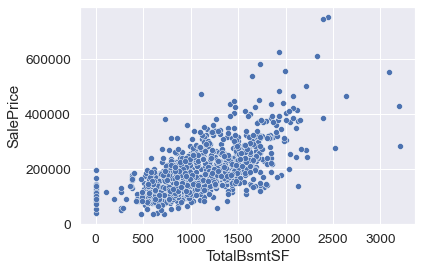

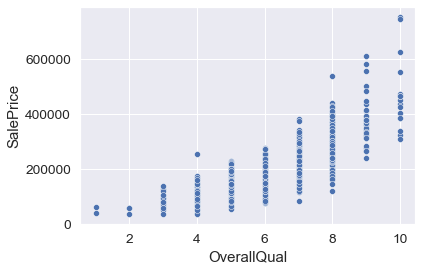

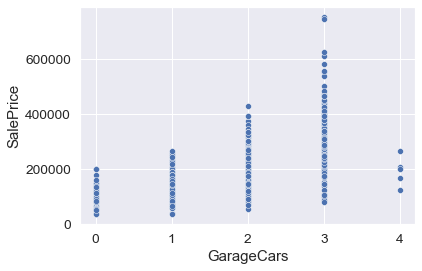

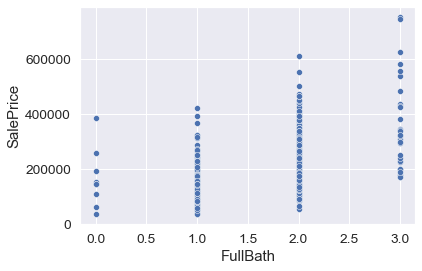

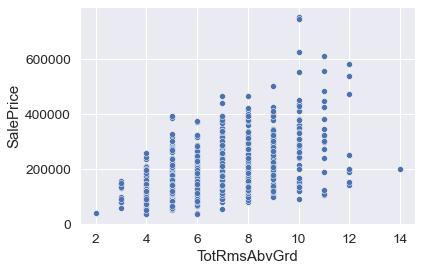

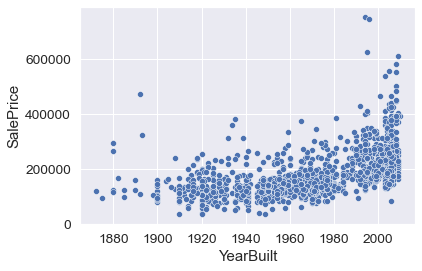

In [39]:
## making sure if outliers are removed from key features of train_df
key_features=['GrLivArea','TotalBsmtSF','OverallQual','GarageCars','FullBath', 'TotRmsAbvGrd', 'YearBuilt']
for i in key_features:
    sns.scatterplot(x=train_df1[i], y=train_df1['SalePrice'])
    plt.show()

In [40]:
train_df1.to_csv('EDA_train_df1.csv')

## 3.5.2.3 Drop outlier GrLivArea from combined_df

In [41]:
# find outlier rows in combined df
data_set.loc[data_set['GrLivArea']>=4500]['GrLivArea']

523     4676
1298    5642
2538    5095
Name: GrLivArea, dtype: int64

In [42]:
# but drop only rows with GrLivArea== 4676 and 5642 from combined df
full_df1 = data_set.drop([data_set.index[523], data_set.index[1298]])
full_df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [43]:
print(data_set.shape)
print(full_df1.shape) # 4 rows are dropped two from train_df, 2 from test_df

(2906, 62)
(2904, 62)


In [44]:
full_df1.to_csv('EDA_full_df1.csv')

# EDA Summary:
    - Univariate plot/Histogram of numeric columns from data_set shows that LotArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea columns had skewed distribution; may require log transformation
    - Bivariate plots/scatter plots of numeric columns with SalePrice shows that TotalBmsSF, OverallQual,BsmtFinSF1, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea related linearly with SalePrice
    - Since some numeric features contain discrete values. BoxPlotting of those features with Sale price showed better distribution of SalePrice across different groups of features.
    - MSSubClass had several discreate values; created new feature by grouping the values.
    - With Correlation matrix, found top10 predictive features of SalePrice
    - Outliers are detected with GrLivArea >4500; TotalBsmtSF>6000; TotRmsAbvGrd>12. Dropped outliers from combined and trained_data_sets